#  Commitment Of Traders
The Commitment of Traders (COT) report is a weekly publication that shows the aggregate holdings of different participants in the U.S. futures market. Published every Friday by the Commodity Futures Trading Commission (CFTC) at 3:30 E.T., the COT report is a snapshot of the commitment of the classified trading groups as of Tuesday that same week. The report provides investors with up-to-date information on futures market operations and increases the transparency of these complex exchanges. It is used by many futures traders as a market signal on which to trade.


- The Commitment of Traders (COT) report is a weekly publication that shows the aggregate holdings of different participants in the U.S. futures market.

- These are compiled and published by the CFTC in the U.S.

- COT reports detail how many long, short, and spread positions make up the open interest.

- Traders can use the report to help them determine whether they should take short or long positions in their trades.

- There are four different COT reports: the Legacy, Supplemental, Disaggregated, and the Traders in Financial Futures reports.

In [285]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [286]:
url = "https://www.tradingster.com/cot/legacy-futures/13874A"
response = requests.get(url)
full_html = response.text

In [287]:
soup = BeautifulSoup(full_html, 'html.parser')
numbers = [element.get_text() for element in soup.find_all(class_='number')]

In [288]:
contract_codes_ordered = {
    "ES": "13874A",  # S&P 500
    "NQ": "209742",  # Nasdaq 100
    "YM": "124603",  # Dow Jones
    "RTY": "239742",  # Russell 2000
    "NKD": "240741",  #Nikkei 225

    "GC": "088691",  # Gold
    "SI": "084691",  # Silver
    "PL": "076651",  # Platinum
    "HG": "085692",  # Copper
    "PA": "075651",  # Palladium
    
    "CL ": "067651",  # Crude Oil
    "HO": "022651",  # Heating Oil
    "RB ": "111659",  # Gasoline
    "NG": "023651",  # Natural Gas

    "ZB": "020601",  
    "ZN": "043602",  
    "UB": "020604", 

    "USD": "098662",  # Dollar Index
    "AUD": "232741",  # Australian Dollar
    "GBP ": "096742",  # British Pound
    "CAD": "090741",  # Canadian Dollar
    "ZAR ": "122741",  # South African Rand
    "EUR": "099741",  # Euro
    "JPY": "097741",  # Japanese Yen
    "CHF": "092741",  # Swiss Franc
    "NZD": "112741",  # New Zealand Dollar
    "MXN": "095741",  # Mexican Peso
    
    "BTC": "133741", # Bitcoin
    "VX": "1170E1"  # Vix futures
}

This script only uses the most recent COT data in order to form insights into the markets direction. An extension of this project worth looking into is collecting the historical data in order to then create and backtest a model which can predict the weeks direction with moderate accuracy

In [289]:
def fetch_data_for_contract(code):
    url = f"https://www.tradingster.com/cot/legacy-futures/{code}"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    numbers = [element.get_text() for element in soup.find_all(class_='number')]

    if len(numbers) < 27:
        return [None] * 27  

    def parse_number(num_str):
        try:
            return int(num_str.replace(',', '').replace('+', '').replace('-', '').strip())
        except ValueError:
            return None

    def parse_percentage(perc_str):
        try:
            return float(perc_str.replace('%', '').strip())
        except ValueError:
            return None

    try:
        open_interest = parse_number(numbers[0])
        non_commercial_long = parse_number(numbers[1])
        non_commercial_short = parse_number(numbers[2])
        non_commercial_spreads = parse_number(numbers[3])
        commercial_long = parse_number(numbers[4])
        commercial_short = parse_number(numbers[5])
        total_long = parse_number(numbers[6])
        total_short = parse_number(numbers[7])
        non_reportable_long = parse_number(numbers[8])
        non_reportable_short = parse_number(numbers[9])
        change_open_interest = parse_number(numbers[10])
        change_non_commercial_long = parse_number(numbers[11])
        change_non_commercial_short = parse_number(numbers[12])
        change_non_commercial_spreads = parse_number(numbers[13])
        change_commercial_long = parse_number(numbers[14])
        change_commercial_short = parse_number(numbers[15])
        change_total_long = parse_number(numbers[16])
        change_total_short = parse_number(numbers[17])
        change_non_reportable_long = parse_number(numbers[18])
        change_non_reportable_short = parse_number(numbers[19])
        percent_non_commercial_long = parse_percentage(numbers[20])
        percent_non_commercial_short = parse_percentage(numbers[21])
        percent_non_commercial_spreads = parse_percentage(numbers[22])
        percent_commercial_long = parse_percentage(numbers[23])
        percent_commercial_short = parse_percentage(numbers[24])
        percent_total_long = parse_percentage(numbers[25])
        percent_total_short = parse_percentage(numbers[26])
    except Exception as e:
        print(f"Error processing data for code {code}: {e}")
        return [None] * 27

    return [
        open_interest, non_commercial_long, non_commercial_short, 
        non_commercial_spreads, commercial_long, commercial_short,
        total_long, total_short, non_reportable_long, non_reportable_short,
        change_open_interest, change_non_commercial_long, change_non_commercial_short, 
        change_non_commercial_spreads, change_commercial_long, change_commercial_short,
        change_total_long, change_total_short, change_non_reportable_long, 
        change_non_reportable_short,
        percent_non_commercial_long, percent_non_commercial_short,
        percent_non_commercial_spreads, percent_commercial_long,
        percent_commercial_short, percent_total_long, percent_total_short
    ]

data = []
for symbol, code in contract_codes_ordered.items():
    result = fetch_data_for_contract(code)
    if result and any(result):  # Only append if there is data
        data.append([symbol] + result)

columns = [
    'Symbol', 'Open Interest', 'Non-Commercial Long', 'Non-Commercial Short', 
    'Non-Commercial Spreads', 'Commercial Long', 'Commercial Short', 
    'Total Long', 'Total Short', 'Non Reportable Long', 'Non Reportable Short', 
    'Change in Open Interest', 'Change Non Commercial Long', 'Change Non Commercial Short', 
    'Change in Spreads', 'Change Commercial Long', 'Change Commercial Short', 
    'Change Total Long', 'Change Total Short', 'Change Non Reportable Long', 
    'Change Non Reportable Short',
    'Percent Of Open Interest for Non Commercial Long', 
    'Percent Of Open Interest for Non Commercial Short',
    'Percent Of Open Interest for Non Commercial Spreads',
    'Percent Of Open Interest for Commercial Long',
    'Percent Of Open Interest for Commercial Short',
    'Percent Of Open Interest Total Long',
    'Percent Of Open Interest Total Short'
]

df = pd.DataFrame(data, columns=columns)

In [290]:
df.head(5)

,Symbol,Open Interest,Non-Commercial Long,Non-Commercial Short,Non-Commercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Non Reportable Long,...,Change Total Short,Change Non Reportable Long,Change Non Reportable Short,Percent Of Open Interest for Non Commercial Long,Percent Of Open Interest for Non Commercial Short,Percent Of Open Interest for Non Commercial Spreads,Percent Of Open Interest for Commercial Long,Percent Of Open Interest for Commercial Short,Percent Of Open Interest Total Long,Percent Of Open Interest Total Short
0,ES,2090007,333866,399310,37041,1449475,1486645,1820382,1922996,269625,...,43342,2970,1555,16.0,19.1,1.8,69.4,71.1,87.1,92.0
1,NQ,256571,64830,59148,8202,141026,159526,214058,226876,42513,...,5488,77,2239,25.3,23.1,3.2,55.0,62.2,83.4,88.4
2,YM,99652,30568,15327,3915,50244,67905,84727,87147,14925,...,9099,1400,2246,30.7,15.4,3.9,50.4,68.1,85.0,87.5
3,RTY,488061,89656,136993,8115,354858,319485,452629,464593,35432,...,34996,8236,5109,18.4,28.1,1.7,72.7,65.5,92.7,95.2
4,NKD,15049,901,6194,2,9607,6813,10510,13009,4539,...,477,181,744,6.0,41.2,0.0,63.8,45.3,69.8,86.4


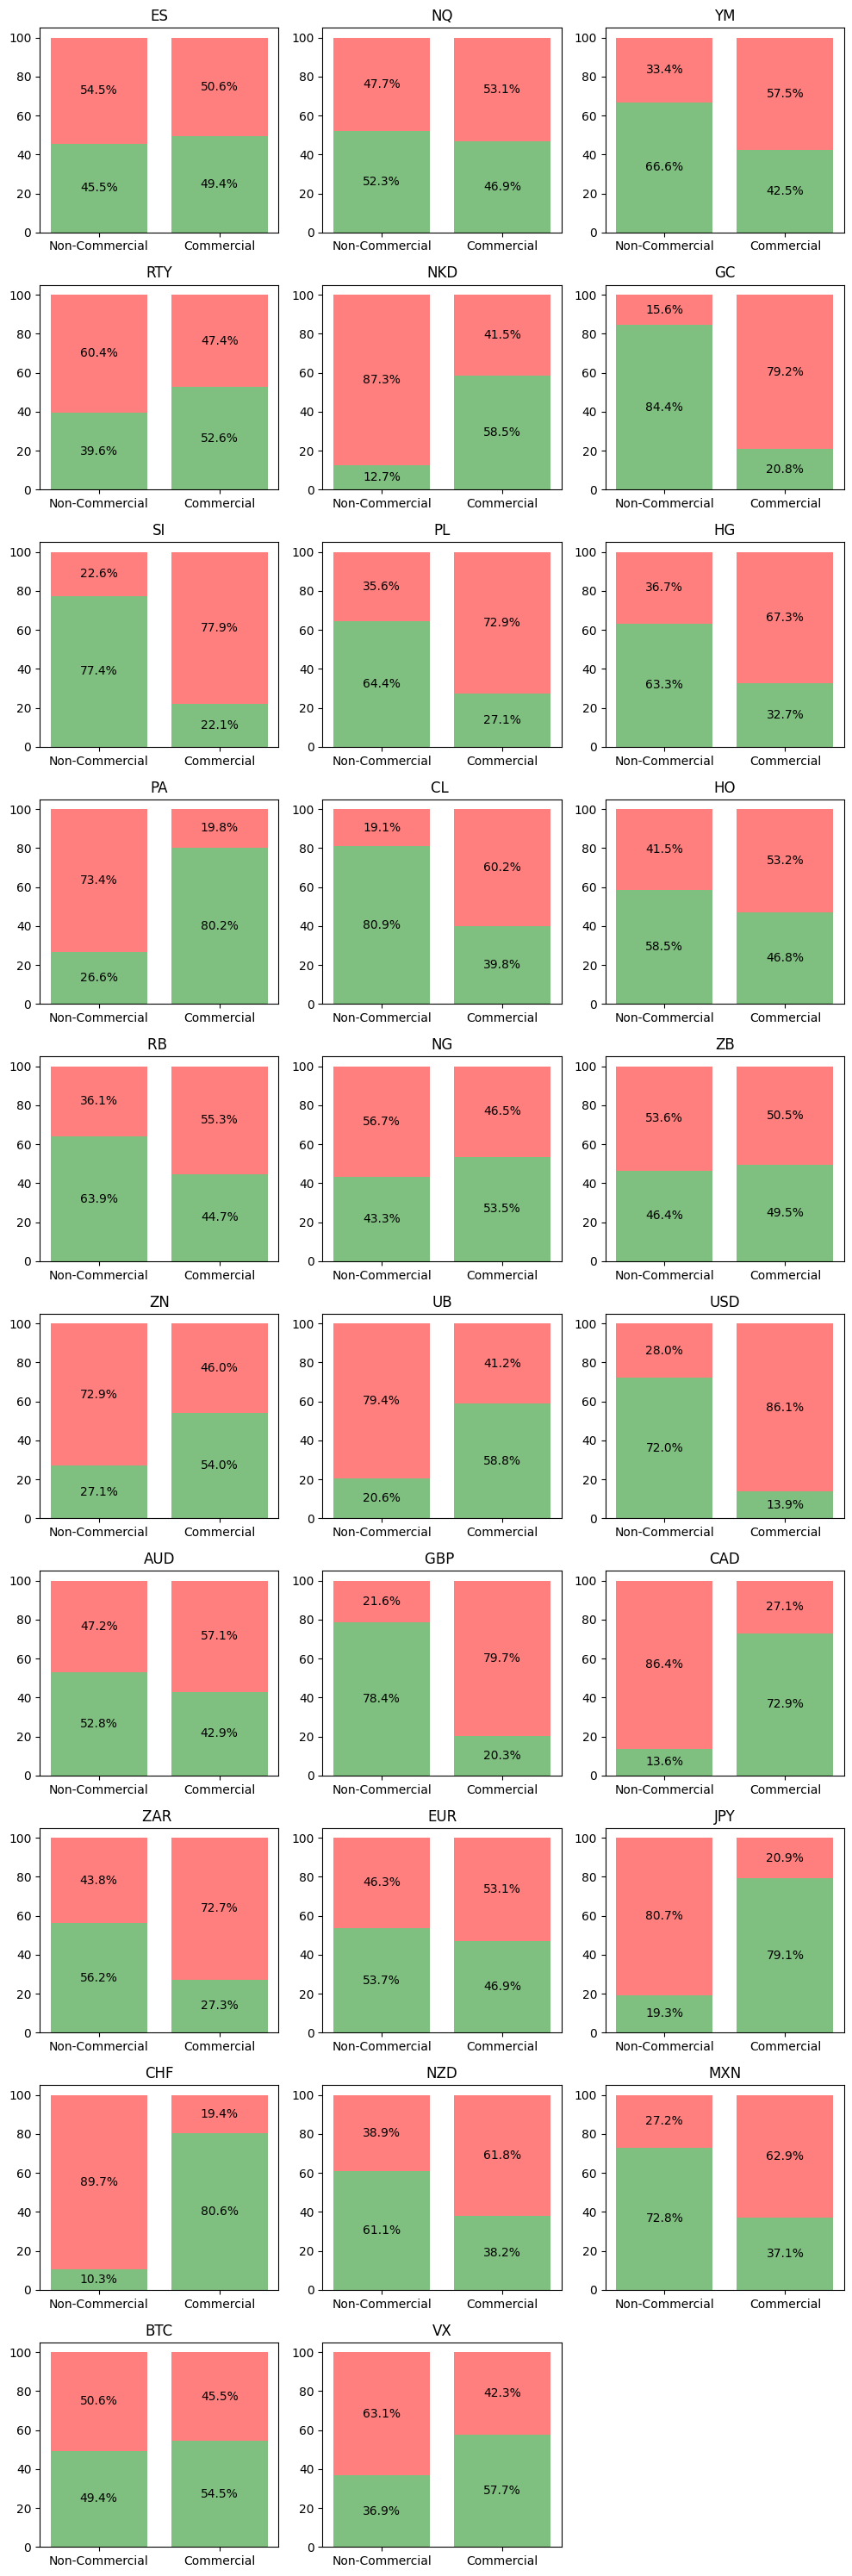

<Figure size 640x480 with 0 Axes>

In [291]:
num_rows = (len(df) + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(10, 3 * num_rows))
axes = axes.flatten()

for index, (i, row) in enumerate(df.iterrows()):
    non_commercial_values = [row['Non-Commercial Long'], row['Non-Commercial Short']]
    commercial_values = [row['Commercial Long'], row['Commercial Short']]
    
    total_non_commercial = sum(non_commercial_values)
    total_commercial = sum(commercial_values)
    non_commercial_percent = [v / total_non_commercial * 100 for v in non_commercial_values]
    commercial_percent = [v / total_commercial * 100 for v in commercial_values]

    categories = ['Non-Commercial', 'Commercial']
    
    bars1 = axes[index].bar(categories[0], non_commercial_percent[0], color='green', alpha=0.5, label='Long')
    bars2 = axes[index].bar(categories[0], non_commercial_percent[1], color='red', alpha=0.5, label='Short', bottom=non_commercial_percent[0])

    bars3 = axes[index].bar(categories[1], commercial_percent[0], color='green', alpha=0.5, label='Long')
    bars4 = axes[index].bar(categories[1], commercial_percent[1], color='red', alpha=0.5, label='Short', bottom=commercial_percent[0])

    axes[index].set_title(f'{row["Symbol"]}')

    for bar in [bars1, bars2, bars3, bars4]:
        for b in bar:
            height = b.get_height()
            bottom = b.get_y()
            axes[index].text(
                b.get_x() + b.get_width() / 2, bottom + height / 2, 
                f'{height:.1f}%',
                ha='center', va='center'
            )

for j in range(len(df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
plt.savefig('output/plot.jpg', format='jpg', dpi=300) 

**Most often, commercials are on the right side of the market.**


In [292]:
df.to_csv('/output/dataframe.csv', index=False) 

OSError: Cannot save file into a non-existent directory: '\output'

# Analysis
For me, the ideal scenario is when
- **Commercials  > 75% long**
- **Non-Commercials  > 75% short.**
- **Opposing pair aligns**
  
However, especially for commodities and indices. This should not weigh too heavy because these two can sometimes positively correlate with the US Dollar

So I want to see commercials clearly positioned towards one side, and on top of that I want to see that retail (non-commercials) are positioned the opposite of the direction in question. Great news! Python can do all the heavy lifting for us so we can get a top list of tickers for whom this is the case. 


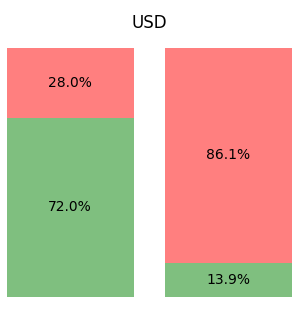                          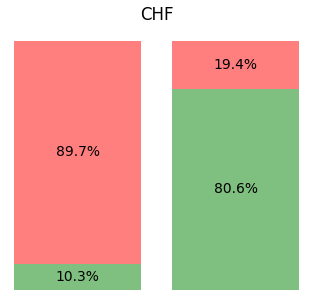


Take a look at this example from 21-07-2024
- **We see that commercials are positioned in longs on CHF (80.6%)**

- **We can see that commercials are positioned in Short on USD (86.1%)**

- **Retail is positioned in the opposing direction for both**


This is a very strong sign that next week(s) we are going to see a rally on USD/CHF.
Logically, this should not be your only confluence for taking a trade but it's an amazing tool for directional bias in the financial markets.

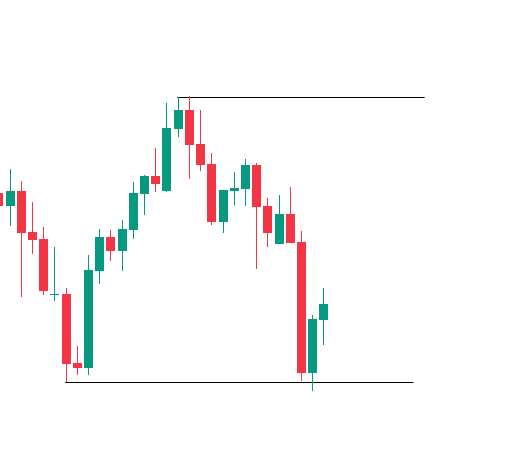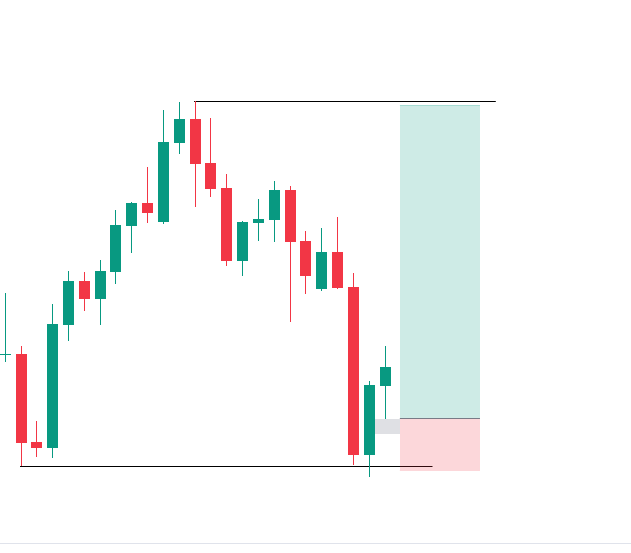

# One-Sided
You know those big impulses you see every now and then? They are usually caused by one-sided markets. When institutional traders are heavily buying while simultaniously, the retail traders are shorting. There is liquidity for the big players to actualy get filled. That's why retail being opposingly positioned too is just as important for me. The push we expect often doesnt happen if retail traders aren't trapped in their positions because there is simply not enough liquidity for the banks and institutions to fill the entirety of their positions. And now you might think: "Why don't they just enter a bit higher?". Believe me, professional market participants do NOT enter higher. If they miss a trade they miss it. Might be another great lesson in there ;)

**Commercials**

Filtering the  tickers with highest one-sided positioning for commercials

In [ ]:
df['Commercial Long %'] = df['Commercial Long'] / (df['Commercial Long'] + df['Commercial Short']) * 100
df['Commercial Short %'] = df['Commercial Short'] / (df['Commercial Long'] + df['Commercial Short']) * 100
df['Non-Commercial Long %'] = df['Non-Commercial Long'] / (df['Non-Commercial Long'] + df['Non-Commercial Short']) * 100
df['Non-Commercial Short %'] = df['Non-Commercial Short'] / (df['Non-Commercial Long'] + df['Non-Commercial Short']) * 100

df['Commercial Long %'] = df['Commercial Long %'].round(1)
df['Commercial Short %'] = df['Commercial Short %'].round(1)

df['Max Commercial %'] = df[['Commercial Long %', 'Commercial Short %']].max(axis=1)
one_sided_commercial = df.nlargest(10, 'Max Commercial %')

In [ ]:
one_sided_commercial[['Symbol', 'Commercial Long %', 'Commercial Short %',]].reset_index(drop=True)

,Symbol,Commercial Long %,Commercial Short %
0,USD,13.9,86.1
1,CHF,80.6,19.4
2,PA,80.2,19.8
3,GBP,20.3,79.7
4,GC,20.8,79.2
5,JPY,79.1,20.9
6,SI,22.1,77.9
7,PL,27.1,72.9
8,CAD,72.9,27.1
9,ZAR,27.3,72.7


In [ ]:
one_sided_commercial.to_csv('/output/one_sided_commercial.csv', index=False) 

**Non-Commercials**

Filtering the  tickers with highest one-sided positioning for non-commercials

In [ ]:
df['Commercial Long %'] = df['Commercial Long'] / (df['Commercial Long'] + df['Commercial Short']) * 100
df['Commercial Short %'] = df['Commercial Short'] / (df['Commercial Long'] + df['Commercial Short']) * 100
df['Non-Commercial Long %'] = df['Non-Commercial Long'] / (df['Non-Commercial Long'] + df['Non-Commercial Short']) * 100
df['Non-Commercial Short %'] = df['Non-Commercial Short'] / (df['Non-Commercial Long'] + df['Non-Commercial Short']) * 100

df['Max Non-Commercial %'] = df[['Non-Commercial Long %', 'Non-Commercial Short %']].max(axis=1)

df['Non-Commercial Long %'] = df['Non-Commercial Long %'].round(1)
df['Non-Commercial Short %'] = df['Non-Commercial Short %'].round(1)

one_sided_non_commercial = df.nlargest(10, 'Max Non-Commercial %')

In [ ]:
one_sided_non_commercial[['Symbol', 'Non-Commercial Long %', 'Non-Commercial Short %',]].reset_index(drop=True)

,Symbol,Non-Commercial Long %,Non-Commercial Short %
0,CHF,10.3,89.7
1,NKD,12.7,87.3
2,CAD,13.6,86.4
3,GC,84.4,15.6
4,CL,80.9,19.1
5,JPY,19.3,80.7
6,UB,20.6,79.4
7,GBP,78.4,21.6
8,SI,77.4,22.6
9,PA,26.6,73.4


In [ ]:
one_sided_non_commercial.to_csv('/output/one_sided_non_commercial.csv', index=False) 

# Open Interest
Imagine the bustling floor of a futures trading exchange, where traders, each with their own strategies and insights, are making decisions. In this vibrant setting, Open Interest is like the heartbeat of the market—a measure of how many contracts are still active and haven't been settled yet.

Liquidity is one of the first things that traders notice. When open interest is high, it's like a crowded marketplace with plenty of stalls. Traders can move in and out of positions smoothly, without pushing the prices around too much. It's a sign that the market is busy and liquid.

But open interest isn’t just about numbers. It’s also a window into Market Sentiment. Imagine the market as a huge, shifting ocean. Rising open interest is like watching more boats setting sail; it suggests that traders are bringing in fresh money and might believe in a strong trend. On the flip side, if open interest starts to drop, it's like seeing fewer boats on the water, hinting that the current trend might be running out of steam.

Now, how does open interest play into Volatility? Think of volatility as the waves in our ocean. High open interest is like having a lot of boats on choppy waters; it often means there’s a lot of activity and potential for big movements. Traders are betting on future price changes, which can stir up more volatility. But if open interest is low, it’s like a calm sea with fewer boats, suggesting a quieter market with potentially less dramatic price swings.

So, while open interest doesn’t directly measure how rough the seas will be, it gives traders clues about the market's mood and activity level. It helps them understand whether they're navigating a busy, bustling market or a quieter, less active one.

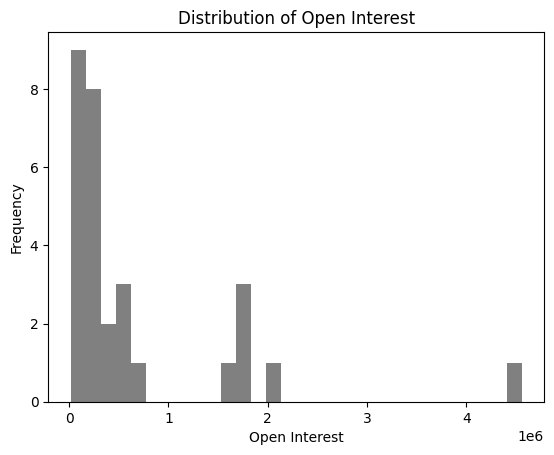

In [ ]:
df['Open Interest'].hist(bins=30, color='gray')
plt.title('Distribution of Open Interest')
plt.xlabel('Open Interest')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


Noteable insight here too: we have a single ticker which has more than double the open interest than second place... Let's investigate

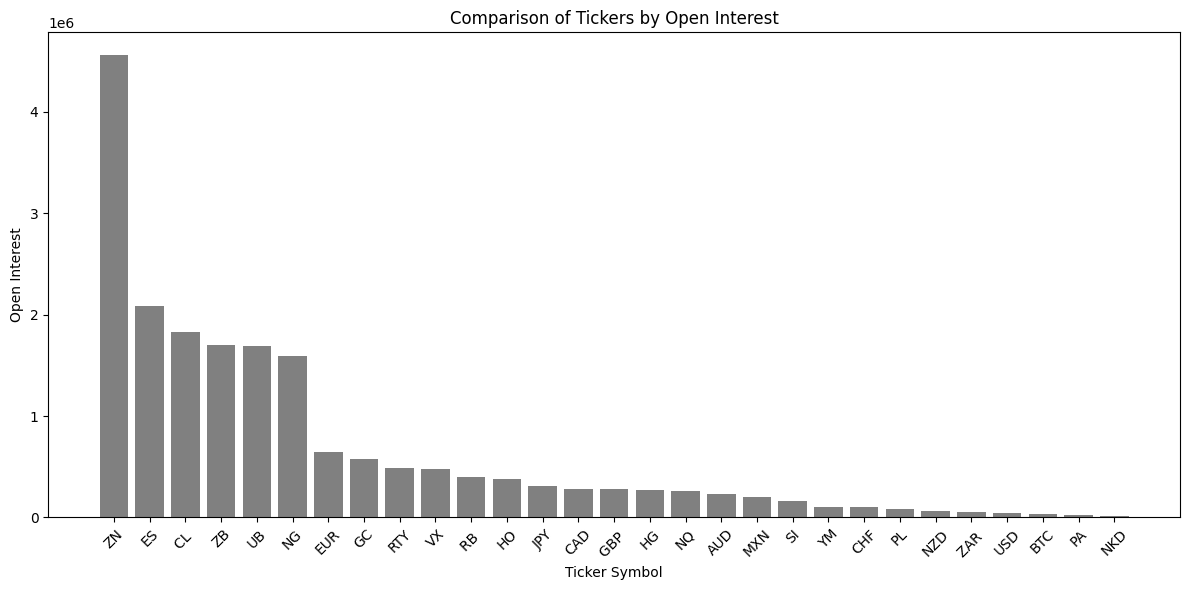

In [ ]:
df_sorted = df.sort_values(by='Open Interest', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_sorted['Symbol'], df_sorted['Open Interest'], color='gray')
plt.xlabel('Ticker Symbol')
plt.ylabel('Open Interest')
plt.title('Comparison of Tickers by Open Interest')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

**ZN : 10Y-US-Treasury Note**  

Try to answer for yourself. Why would open interest on mid-term bonds be high at the moment? Can you give an explanation?

In [ ]:
df_sorted.head()

,Symbol,Open Interest,Non-Commercial Long,Non-Commercial Short,Non-Commercial Spreads,Commercial Long,Commercial Short,Total Long,Total Short,Non Reportable Long,...,Percent Of Open Interest for Commercial Long,Percent Of Open Interest for Commercial Short,Percent Of Open Interest Total Long,Percent Of Open Interest Total Short,Commercial Long %,Commercial Short %,Non-Commercial Long %,Non-Commercial Short %,Max Commercial %,Max Non-Commercial %
15,ZN,4556483,378531,1016017,100868,3614914,3077267,4094313,4194152,462170,...,79.3,67.5,89.9,92.0,54.016979,45.983021,27.1,72.9,54.0,72.856366
0,ES,2090007,333866,399310,37041,1449475,1486645,1820382,1922996,269625,...,69.4,71.1,87.1,92.0,49.367022,50.632978,45.5,54.5,50.6,54.463048
10,CL,1831212,376427,88826,735670,635900,960964,1747997,1785460,83215,...,34.7,52.5,95.5,97.5,39.821801,60.178199,80.9,19.1,60.2,80.908022
14,ZB,1698808,307574,354724,14148,1153768,1179234,1475490,1548106,223318,...,67.9,69.4,86.9,91.1,49.454222,50.545778,46.4,53.6,50.5,53.559576
16,UB,1686411,146603,566001,5800,1357495,951860,1509898,1523661,176513,...,80.5,56.4,89.5,90.3,58.782431,41.217569,20.6,79.4,58.8,79.427143


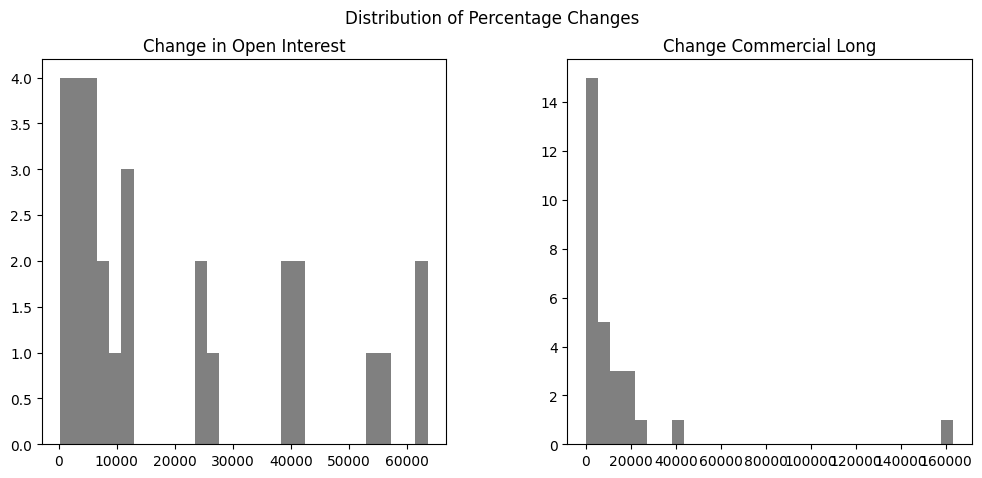

In [ ]:
axes = df[['Change in Open Interest', 'Change Commercial Long']].hist(bins=30, color="gray", figsize=(12, 5), layout=(1, 2))

for ax in axes.flatten():
    ax.grid(False)

plt.suptitle('Distribution of Percentage Changes')
plt.show()

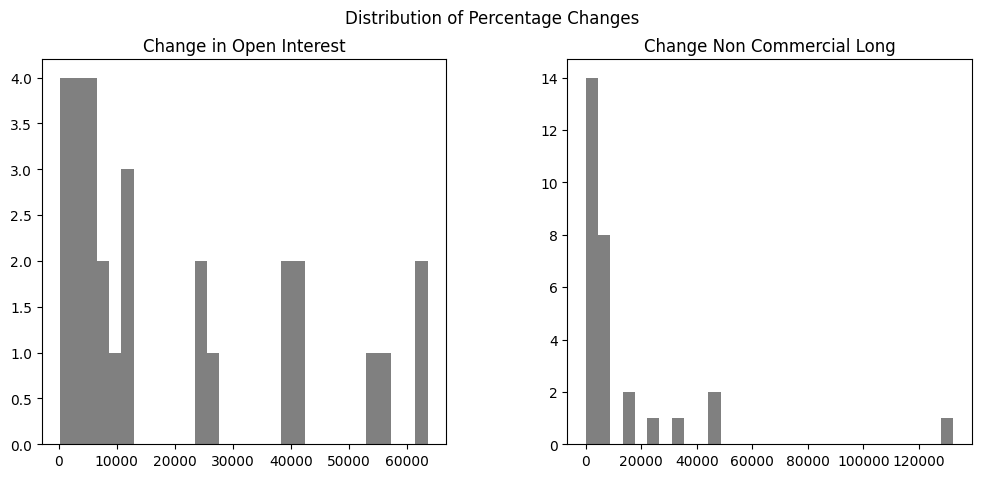

In [ ]:
axes = df[['Change in Open Interest', 'Change Non Commercial Long']].hist(bins=30, color="gray", figsize=(12, 5), layout=(1, 2))

for ax in axes.flatten():
    ax.grid(False)

plt.suptitle('Distribution of Percentage Changes')
plt.show()

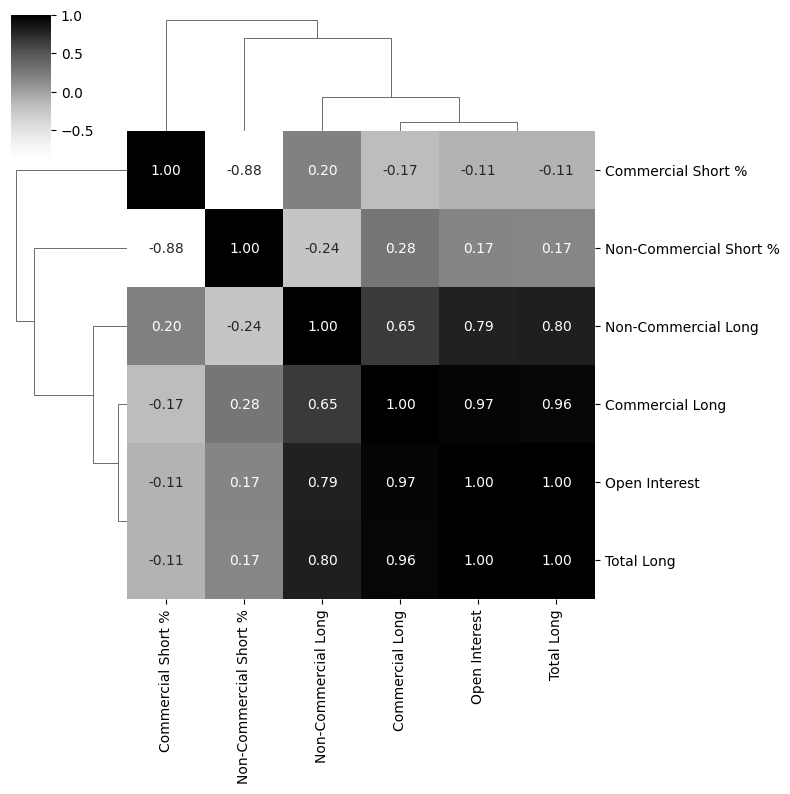

In [ ]:
sns.clustermap(correlation_matrix, annot=True, cmap='Greys', figsize=(8, 8), fmt='.2f')
plt.title('', pad=100)
plt.show()

This clustermap shows very concisely that non-commercial and commercial are pretty far away from each other in terms of the direction they trade in

# Weekly Changes
We have more datapoints. To be exact, we have the change in positioning compared to last week. 
Aggressive changes in these numbers, especially from the commercials, could indicate that they know something we dont.  Another use-case is in the following example: let's say im bullish on US indices for upcoming week, I can see in the data that NQ got bought up a lot more than ES or YM did. So therefore, it might be the right move to follow the big boys and also enter NQ

In [ ]:
df[['Change Non Commercial Long', 'Change Non Commercial Short', 'Change Commercial Long', 'Change Commercial Short']].head()

,Change Non Commercial Long,Change Non Commercial Short,Change Commercial Long,Change Commercial Short
0,24108,34541,15160,9252
1,1507,1972,7231,4450
2,8251,805,1507,8107
3,34289,14000,1602,21814
4,24,477,423,1


Plotting the weekly changes below this cell.  

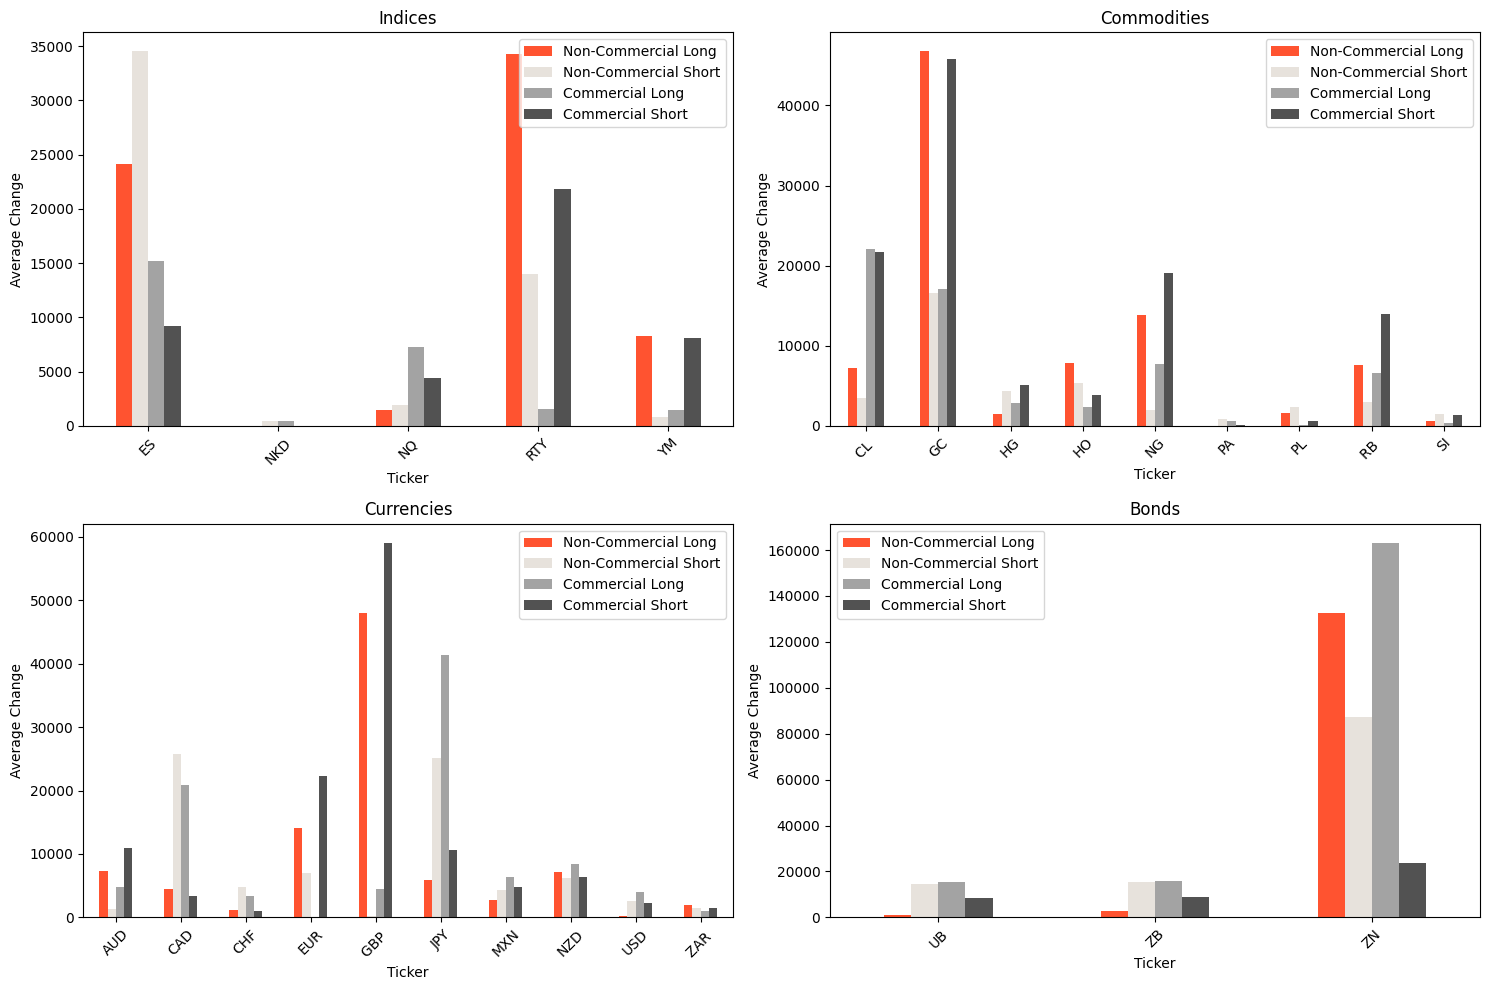

In [ ]:
asset_classes = {
    'Indices': ['ES', 'NQ', 'YM', 'RTY', 'NKD'],
    'Commodities': ['GC', 'SI', 'PL', 'HG', 'PA', 'CL ', 'HO', 'RB ', 'NG'],
    'Currencies': ['USD', 'AUD', 'GBP ', 'CAD', 'ZAR ', 'EUR', 'JPY', 'CHF', 'NZD', 'MXN'],
    'Bonds': ['ZB', 'ZN', 'UB'],
    # 'Crypto': ['BTC'],
    # 'Volatility': ['VX']
}

# Define shorter names for the position types
short_names = {
    'Change Non Commercial Long': 'Non-Com. Long',
    'Change Non Commercial Short': 'Non-Com. Short',
    'Change Commercial Long': 'Com. Long',
    'Change Commercial Short': 'Com. Short'
}


num_classes = len(asset_classes)
num_cols = 2 
num_rows = (num_classes + num_cols - 1) // num_cols  

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten to make indexing easier

for i, (asset_class, tickers) in enumerate(asset_classes.items()):
    class_df = df[df['Symbol'].isin(tickers)]

    average_changes = class_df.groupby('Symbol')[['Change Non Commercial Long', 'Change Non Commercial Short', 'Change Commercial Long', 'Change Commercial Short']].mean()

    average_changes.plot(kind='bar', ax=axes[i], color=['#ff5330', '#e7e2dc', '#a3a3a3', '#525252'])

    axes[i].set_xticklabels([short_names.get(ticker, ticker) for ticker in average_changes.index], rotation=45)
    
    axes[i].set_title(f'{asset_class}')
    axes[i].set_xlabel('Ticker')
    axes[i].set_ylabel('Average Change')
    axes[i].legend(['Non-Commercial Long', 'Non-Commercial Short', 'Commercial Long', 'Commercial Short'])

for j in range(len(asset_classes), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Observations:
- Indices : 

In [ ]:
threshold_commercial = df[['Change Commercial Long', 'Change Commercial Short']].mean().max() * 0.5  # 50% of max average change
threshold_non_commercial = df[['Change Non Commercial Long', 'Change Non Commercial Short']].mean().max() * 0.5  # 50% of max average change

opposing_changes = df[
    (df['Change Commercial Long'].abs() > threshold_commercial) & 
    (df['Change Commercial Short'].abs() > threshold_commercial) &
    (df['Change Non Commercial Long'].abs() > threshold_non_commercial) &
    (df['Change Non Commercial Short'].abs() > threshold_non_commercial)
]

opposing_changes_sorted = opposing_changes.sort_values(
    by=['Change Commercial Long', 'Change Non Commercial Long'],
    ascending=[False, True]
)

print("Occurrences with significant opposing changes:")
opposing_changes_sorted[['Symbol', 'Change Commercial Long', 'Change Commercial Short', 'Change Non Commercial Long', 'Change Non Commercial Short']]

Occurrences with significant opposing changes:


,Symbol,Change Commercial Long,Change Commercial Short,Change Non Commercial Long,Change Non Commercial Short
15,ZN,163277,23904,132402,87180
5,GC,17134,45809,46784,16535
0,ES,15160,9252,24108,34541


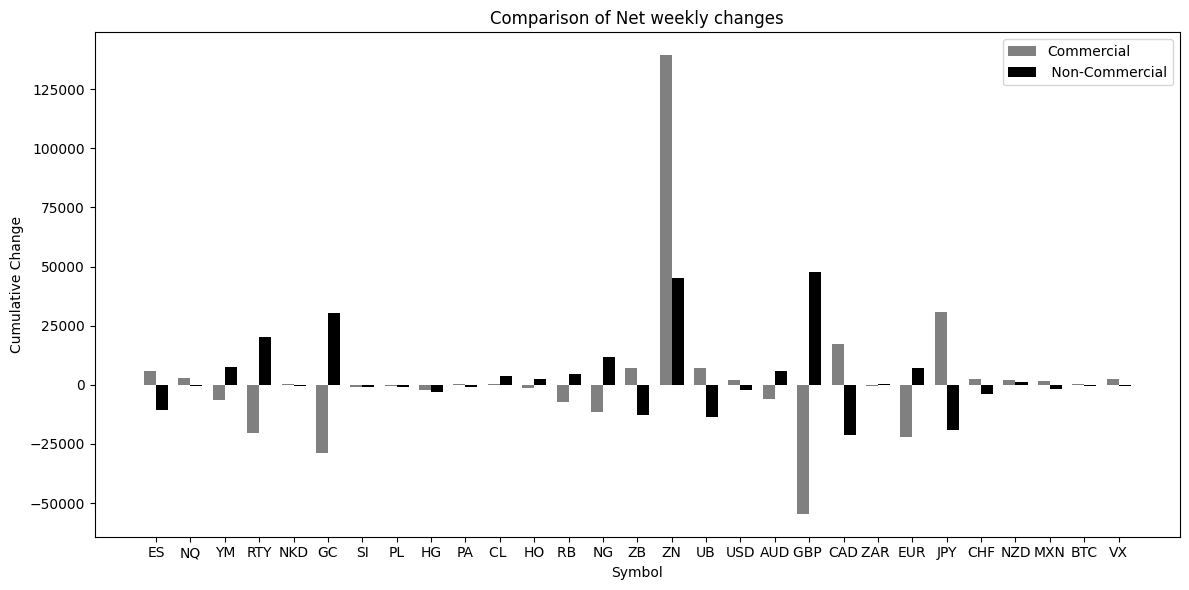

In [ ]:
df['Net Commercial'] = df['Change Commercial Long'] - df['Change Commercial Short']
df['Net Non-Commercial'] = df['Change Non Commercial Long'] - df['Change Non Commercial Short']

num_symbols = len(df)
width = 0.35 
x = range(num_symbols)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar([pos - width/2 for pos in x], df['Net Commercial'], width, label='Commercial', color='gray')
ax.bar([pos + width/2 for pos in x], df['Net Non-Commercial'], width, label=' Non-Commercial', color='black')

ax.set_xticks(x)
ax.set_xticklabels(df['Symbol'])
ax.set_xlabel('Symbol')
ax.set_ylabel('Cumulative Change')
ax.set_title('Comparison of Net weekly changes')
ax.legend()

plt.tight_layout()
plt.show()

What we can take away from this chart is that for example, for ES, commercials entered more additional longs than they entered additional shorts. What we can conclude from this is that institutions :

-  **Have scaled in to ES compared to last week.**

- **They have scaled out from Gold**

-  **GBP Looks interesting too**

- **They have Scaled in heavily onto ZN** - Remember ZN and it's Open Interest being through the roof?

# Beyond This Notebook
1. Add historical COT reports
2. Backtest certain hypothesis to see how good of a tool this actually is in terms of bias
3. Train a ML model on the COT report data to do forecasting or discover hidden anomalies